In [6]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("spscientist/students-performance-in-exams")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'students-performance-in-exams' dataset.
Path to dataset files: /kaggle/input/students-performance-in-exams


Using Colab cache for faster access to the 'students-performance-in-exams' dataset.
Path to dataset files: /kaggle/input/students-performance-in-exams
Dataset loaded successfully!


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Data preprocessing complete!
Train shape: (800, 8) Test shape: (200, 8)


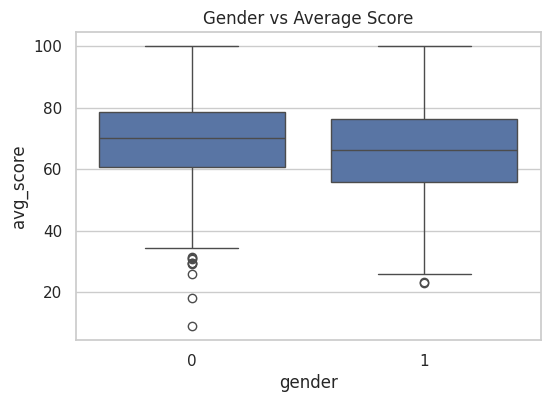

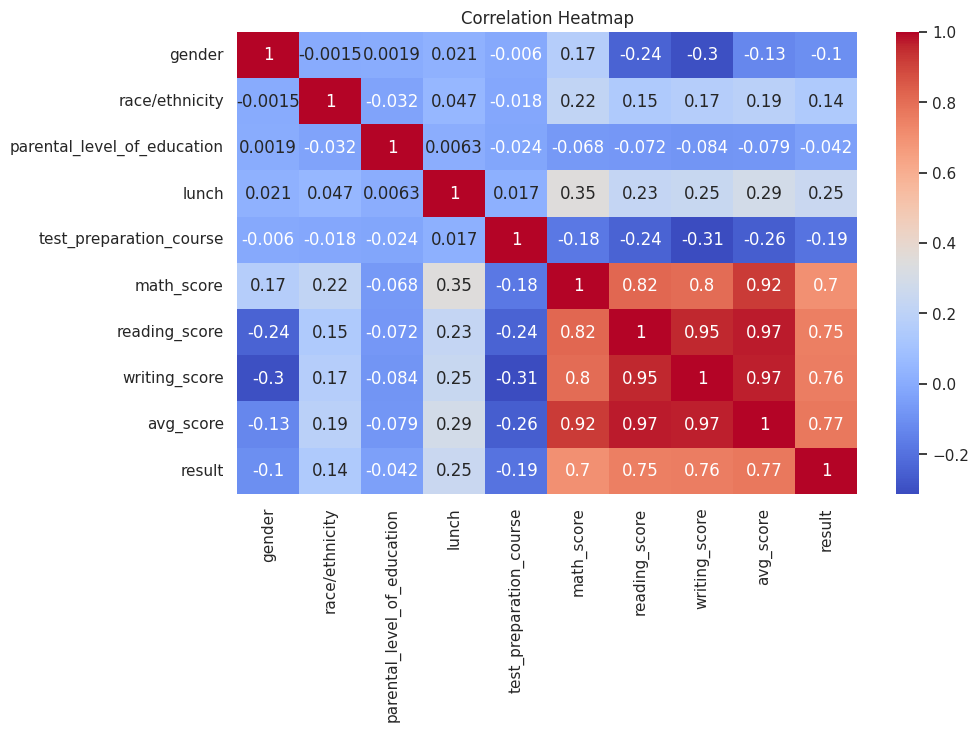

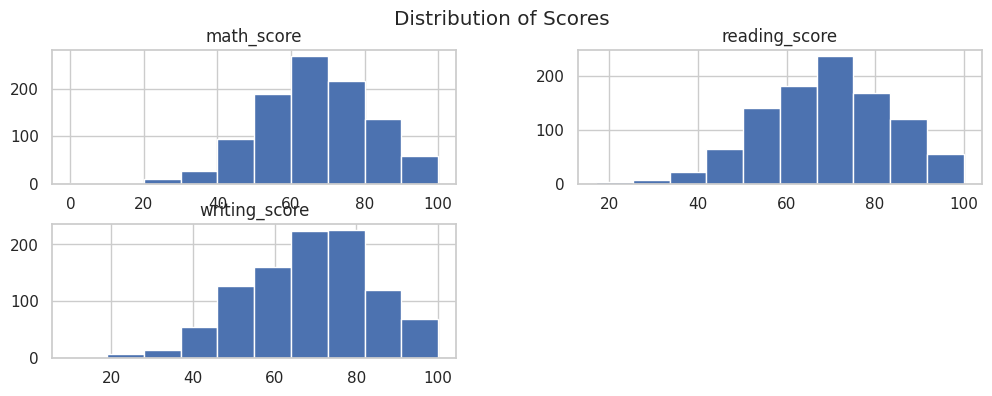

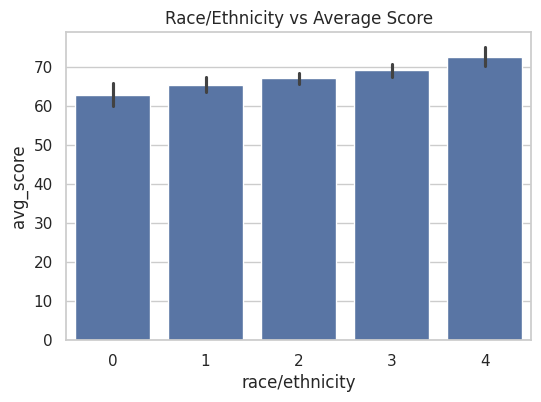

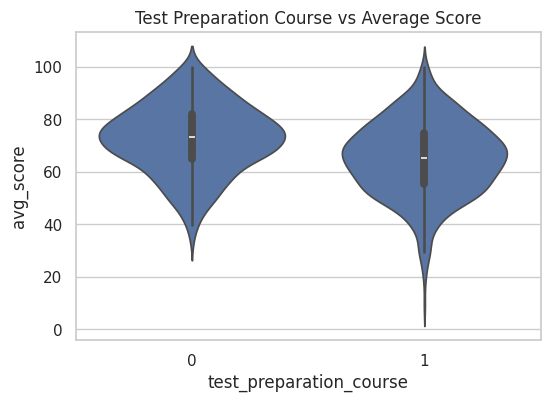

Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5834 - loss: 0.6696 - val_accuracy: 0.9312 - val_loss: 0.4157
Epoch 2/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9053 - loss: 0.3661 - val_accuracy: 0.9625 - val_loss: 0.2488
Epoch 3/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9272 - loss: 0.2334 - val_accuracy: 0.9688 - val_loss: 0.1617
Epoch 4/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9450 - loss: 0.1689 - val_accuracy: 0.9688 - val_loss: 0.1142
Epoch 5/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9589 - loss: 0.1482 - val_accuracy: 0.9812 - val_loss: 0.0890
Epoch 6/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9581 - loss: 0.1148 - val_accuracy: 0.9812 - val_loss: 0.0715
Epoch 7/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9499 - loss: 0.1086 - val_accuracy: 0.9937 - val_loss: 0.0619
Epoch 8/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9715 - loss: 0.0817 - val_accuracy: 1.0000 - val_loss

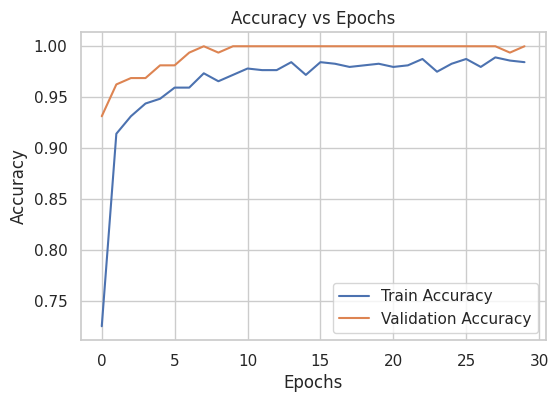

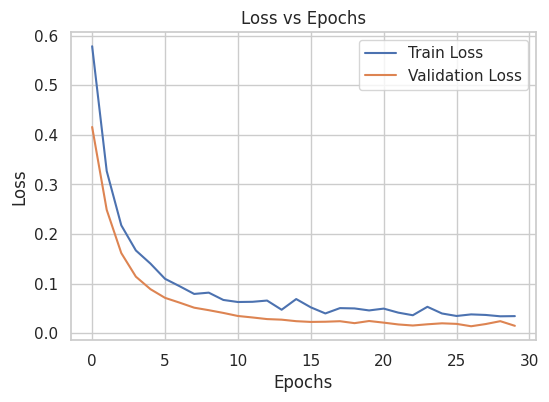

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


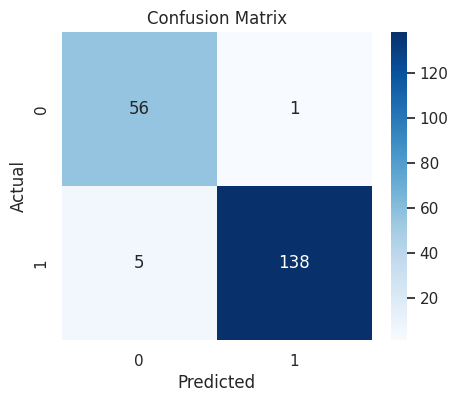

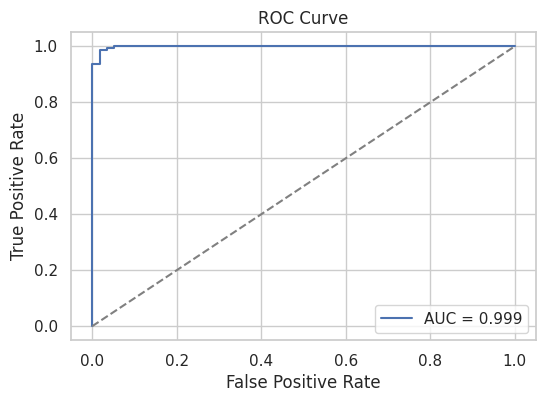

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        57
           1       0.99      0.97      0.98       143

    accuracy                           0.97       200
   macro avg       0.96      0.97      0.96       200
weighted avg       0.97      0.97      0.97       200



In [8]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings("ignore")

# Step 2: Download Dataset using kagglehub
import kagglehub

# Download the dataset
path = kagglehub.dataset_download("spscientist/students-performance-in-exams")
print("Path to dataset files:", path)

# Load dataset CSV
df = pd.read_csv(path + "/StudentsPerformance.csv")  # adjust path if necessary
print("Dataset loaded successfully!")
display(df.head())

# Step 3: Data Cleaning & Preprocessing
# Strip column names and lowercase
df.columns = [c.strip().lower().replace(" ", "_") for c in df.columns]

# Create avg_score & result columns
df['avg_score'] = df[['math_score', 'reading_score', 'writing_score']].mean(axis=1)
df['result'] = np.where(df['avg_score'] >= 60, 1, 0)

# Encode categorical variables
cat_cols = ['gender', 'race/ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# Step 4: Train-Test Split
X = df.drop(['avg_score', 'result'], axis=1)
y = df['result']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standardize numeric features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Data preprocessing complete!")
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

# Step 5: Exploratory Data Analysis (Visualizations)
sns.set(style="whitegrid")

# 1. Gender vs Average Score
plt.figure(figsize=(6,4))
sns.boxplot(x='gender', y='avg_score', data=df)
plt.title("Gender vs Average Score")
plt.show()

# 2. Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# 3. Distribution of Scores
df[['math_score','reading_score','writing_score']].hist(figsize=(12,4))
plt.suptitle("Distribution of Scores")
plt.show()

# 4. Race/Ethnicity vs Average Score
plt.figure(figsize=(6,4))
sns.barplot(x='race/ethnicity', y='avg_score', data=df, estimator=np.mean)
plt.title("Race/Ethnicity vs Average Score")
plt.show()

# 5. Test Preparation Course Impact
plt.figure(figsize=(6,4))
sns.violinplot(x='test_preparation_course', y='avg_score', data=df)
plt.title("Test Preparation Course vs Average Score")
plt.show()

# Step 6: Build Deep Learning Model (MLP)
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print("Model Summary:")
model.summary()

# Step 7: Train Model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=16,
    verbose=1
)

# Step 8: Model Evaluation
# Accuracy vs Epochs
plt.figure(figsize=(6,4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Epochs")
plt.legend()
plt.show()

# Loss vs Epochs
plt.figure(figsize=(6,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs")
plt.legend()
plt.show()

# Predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob >= 0.5).astype(int)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))
